In [93]:
from parrot import py_predictor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
seq = "MAGRSWLIDSNRIATKIMSASASSDPRQVVWKSNPSRHCPKCQHVIDNSDVVDDWPGLPRGVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKNLPGVKSDGTVSHFFHKAIKAYSTGTRKRRKIHDDDFGDVRWHKTGRTKPVVLDGVQRGCKKIMVLYGGKAVKTNWVMHQYHLGIEEDEKEGDYVVSKIFYQQPQQLVVKRGDKAEQEVSEDIFAAVTPTADPVTPKLATPEPRNAVRICSDSHIASDYVTPSDYVSAHEVSLAETSEVMCMEDEVQSIQPNHERPSSGPELEHGLENGAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGSQFILNSQQLVEALSLCDDLLGSQDREENTNSGSLKDKQPCIADYAHLGPEDFKRDLEECQKIVLDPSNIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD"

In [125]:
# Classification - can use function below to convert it to probs as needed
erijman_train_predictor = py_predictor.Predictor("../models/paddle_trained/AD_prediction_network.pt", 
                                                dtype="sequence")

# Regression
paddle_train_predictor = py_predictor.Predictor("../models/paddle_trained/paddleTrain_AD_network.pt", 
                                                dtype="sequence")

In [114]:
# Used approach from https://github.com/idptools/parrot/blob/master/parrot/scripts/parrot_predict.py

def convert_logits_to_probs(logits):
    exp_vals = np.exp(logits)
    probs = exp_vals / np.sum(exp_vals)
    return np.around(probs, decimals=4)

In [129]:
erij_preds = []
padd_preds = []

for i in np.arange(0,len(seq) - 40, 5):
    if i % 10 == 0:
        print(i)
    tile = seq[i: i + 40]
    erij_preds.append(convert_logits_to_probs(erijman_train_predictor.predict(tile))[1])
    padd_preds.append(paddle_train_predictor.predict(tile)[0])

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400


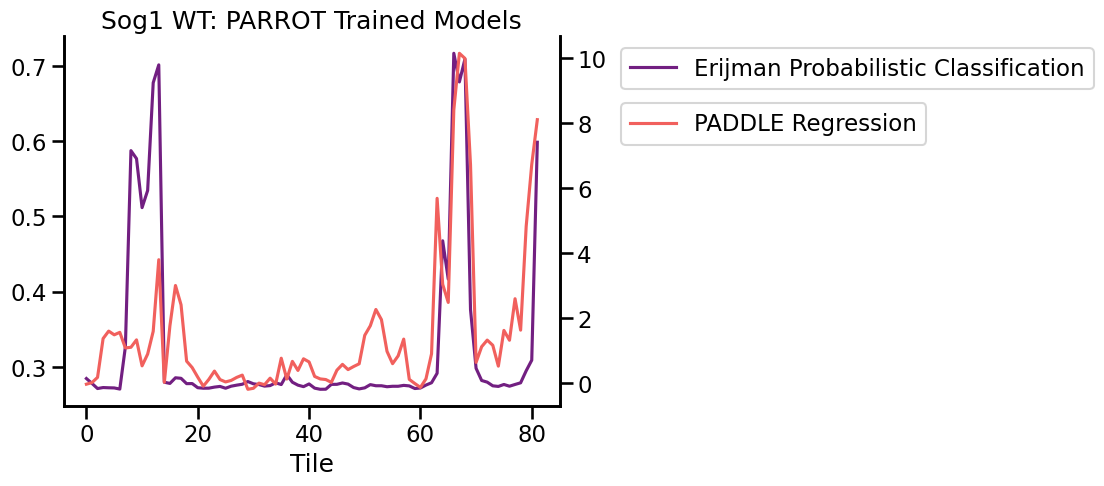

In [171]:
palette = sns.color_palette('magma', 2)
ax = sns.lineplot(erij_preds, label = "Erijman Probabilistic Classification", color = palette[0])
ax2 = ax.twinx()
sns.lineplot(padd_preds, ax = ax2, color = palette[1], label = "PADDLE Regression")
ax.legend(bbox_to_anchor = (1.1,1))
ax2.legend(bbox_to_anchor = (1.1,0.85))
sns.despine(right = False)
plt.title("Sog1 WT: PARROT Trained Models")
ax.set_xlabel("Tile");